Environment Setup

In [ ]:
#Downloading dependencies requires a specific format and can be found in the documentations


import os, signal, sys, time
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !git clone https://github.com/salesforce/ai-economist.git

    %cd ai-economist
    !pip install -e .
    
    # Restart the Python runtime to automatically use the installed packages
    print("\n\nRestarting the Python runtime! Please (re-)run the cells below.")
    time.sleep(1)
    os.kill(os.getpid(), signal.SIGKILL)
else:
    ! pip install ai-economist

Cloning into 'ai-economist'...
remote: Enumerating objects: 970, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 970 (delta 99), reused 173 (delta 94), pack-reused 770
Receiving objects: 100% (970/970), 2.26 MiB | 14.67 MiB/s, done.
Resolving deltas: 100% (565/565), done.
/content/ai-economist
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ai-economist
     |████████████████████████████████| 97 kB 2.6 MB/s 
     |████████████████████████████████| 219 kB 11.7 MB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 115 kB 14.0 MB/s 
     |████████████████████████████████| 137 kB 14.1 MB/s 
     |████████████████████████████████| 283 kB 14.2 MB/s 
     |████████████████████████████████| 147 kB 15.3 MB/s 
     |████████████████████████████████| 402 kB 15.4 MB/s 
     |██████████████████████████████



Restarting the Python runtime! Please (re-)run the cells below.


In [1]:
#Required Dependencies

! pip install ai-economist>=1.5
! pip install gym==0.21
! pip install tensorflow==1.14
! pip install "ray[rllib]==0.8.4"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 7.7 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616824 sha256=c648bf98ac9bd641276788801126756c5092af722783a0772272caad698fbee7
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 44 kB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
     |████████████████████████████████| 488 kB 76.9 MB/s 
     |████████████████████████████████| 3.1 MB 43.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estima

In [2]:
# Another setup cell extracted from documentation

import os, sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    os.chdir("/content/ai-economist/tutorials")
else:
    os.chdir(os.path.dirname(os.path.abspath("__file__"))
)

In [3]:
#import packages

import numpy as np

# Import foundation
from ai_economist import foundation

#allows for creation and saving of classes for scenarios and resources 
from ai_economist.foundation.base.base_env import BaseEnvironment, scenario_registry

#Allows for the creation of components 
from ai_economist.foundation.base.base_component import BaseComponent, component_registry

Inside covid19_components.py: 1 GPUs are available.
Inside covid19_env.py: 1 GPUs are available.


Environment Parameters

In [4]:
# Scenario classes registered in scenario_registry
print(scenario_registry.entries)

# Note - COVID scenarios require a password and are unavailable 

['CovidAndEconomySimulation', 'layout_from_file/simple_wood_and_stone', 'multi_zone/simple_wood_and_stone', 'one-step-economy', 'quadrant/simple_wood_and_stone', 'split_layout/simple_wood_and_stone', 'uniform/simple_wood_and_stone']


In [5]:
# Components:
print(foundation.components.entries)

['Build', 'ContinuousDoubleAuction', 'ControlUSStateOpenCloseStatus', 'FederalGovernmentSubsidy', 'Gather', 'PeriodicBracketTax', 'SimpleLabor', 'VaccinationCampaign', 'WealthRedistribution']


In [6]:
# Define a configuration (dictionary) for the "gather-trade-build" environment.

env_config_dict = {
    # ===== SCENARIO CLASS =====
    # Which Scenario class to use: the class's name in the Scenario Registry (foundation.scenarios).
    # The environment object will be an instance of the Scenario class.
    'scenario_name': 'layout_from_file/simple_wood_and_stone',
    
    # ===== COMPONENTS =====
    # Which components to use (specified as list of ("component_name", {component_kwargs}) tuples).
    #   "component_name" refers to the Component class's name in the Component Registry (foundation.components)
    #   {component_kwargs} is a dictionary of kwargs passed to the Component class
    # The order in which components reset, step, and generate obs follows their listed order below.
    'components': [
        # (1) Building houses
        ('Build', {
            'skill_dist':                   'pareto', 
            'payment_max_skill_multiplier': 3,
            'build_labor':                  10,
            'payment':                      10
        }),
        # (2) Trading collectible resources
        ('ContinuousDoubleAuction', {
            'max_bid_ask':    15,
            'order_labor':    0.25,
            'max_num_orders': 10,
            'order_duration': 50
        }),
        # (3) Movement and resource collection
        ('Gather', {
            'move_labor':    1,
            'collect_labor': 1,
            'skill_dist':    'pareto'
        }),
        # (4) Planner
        ('PeriodicBracketTax', {
            'tax_model': "fixed-bracket-rates",
            'period':          10,
            'n_brackets':        5,
            'bracket_spacing': 'linear',
            'fixed_bracket_rates': [ .10, .12, .13, .14, .15],
            'usd_scaling':    1000,
            'disable_taxes':  False
        }),
    ],
    
    # ===== SCENARIO CLASS ARGUMENTS =====
    # (optional) kwargs that are added by the Scenario class (i.e. not defined in BaseEnvironment)
    'env_layout_file': 'quadrant_25x25_20each_30clump.txt',
    'starting_agent_coin': 10,
    'fixed_four_skill_and_loc': True,
    
    # ===== STANDARD ARGUMENTS ======
    # kwargs that are used by every Scenario class (i.e. defined in BaseEnvironment)
    'n_agents': 4,          # Number of non-planner agents (must be > 1)
    'world_size': [25, 25], # [Height, Width] of the env world
    'episode_length': 1000, # Number of timesteps per episode
    
    # In multi-action-mode, the policy selects an action for each action subspace (defined in component code).
    # Otherwise, the policy selects only 1 action.
    'multi_action_mode_agents': False,
    'multi_action_mode_planner': True,
    
    # When flattening observations, concatenate scalar & vector observations before output.
    # Otherwise, return observations with minimal processing.
    'flatten_observations': True,
    # When Flattening masks, concatenate each action subspace mask into a single array.
    # Note: flatten_masks = True is required for masking action logits in the code below.
    'flatten_masks': True,
    
    # How often to save the dense logs
    'dense_log_frequency': 1
}

In [7]:
print(foundation.components.entries)

['Build', 'ContinuousDoubleAuction', 'ControlUSStateOpenCloseStatus', 'FederalGovernmentSubsidy', 'Gather', 'PeriodicBracketTax', 'SimpleLabor', 'VaccinationCampaign', 'WealthRedistribution']


In [8]:
!pip list

Package                       Version                        Location
----------------------------- ------------------------------ ---------------------
absl-py                       1.1.0
ai-economist                  1.7.1                          /content/ai-economist
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                0.1.12
ale-py                        0.7.5
altair                        4.2.0
appdirs                       1.4.4
appnope                       0.1.2
argon2-cffi                   20.1.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astroid                       2.5.6
astropy                       4.3.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
att

In [9]:
!pip uninstall opencv-python --yes

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30


In [10]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.9 MB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [11]:
env = foundation.make_env_instance(**env_config_dict)

In [12]:
from rllib.env_wrapper import RLlibEnvWrapper
env_obj = RLlibEnvWrapper({"env_config_dict": env_config_dict}, verbose=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

[EnvWrapper] Spaces
[EnvWrapper] Obs (a)   
action_mask    : (70,)
flat           : (184,)
time           : (1,)
world-idx_map  : (2, 11, 11)
world-map      : (7, 11, 11)


[EnvWrapper] Obs (p)   
action_mask    : (1,)
flat           : (114,)
p0             : (8,)
p1             : (8,)
p2             : (8,)
p3             : (8,)
time           : (1,)
world-idx_map  : (2, 25, 25)
world-map      : (6, 25, 25)


[EnvWrapper] Action (a) Discrete(70)
[EnvWrapper] Action (p) MultiDiscrete([1])


Creating Trainer Object

In [13]:
import ray
from ray.rllib.agents.ppo import PPOTrainer

In [14]:
env_obj.action_space_pl, env_obj.action_space

(MultiDiscrete([1]), Discrete(70))

In [15]:
policies = {
    "a": (
        None,  # uses default policy
        env_obj.observation_space,
        env_obj.action_space,
        {}  # define a custom agent policy configuration.
    ),
    "p": (
        None,  # uses default policy
        env_obj.observation_space_pl,
        env_obj.action_space_pl,
        {}  # define a custom planner policy configuration.
    )
}

# In foundation, all the agents have integer ids and the social planner has an id of "p"
policy_mapping_fun = lambda i: "a" if str(i).isdigit() else "p"

policies_to_train = ["a", "p"]

In [16]:
trainer_config = {
    "multiagent": {
        "policies": policies,
        "policies_to_train": policies_to_train,
        "policy_mapping_fn": policy_mapping_fun,
    }
}

In [17]:
#Optimizable parameters 


trainer_config.update(
    {
        "num_workers": 2,
        "num_envs_per_worker": 2,
        # Other training parameters
        "train_batch_size":  4000,
        "sgd_minibatch_size": 4000,
        "num_sgd_iter": 1
    }
)

In [18]:
# We also add the "num_envs_per_worker" parameter for the env. wrapper to index the environments.
env_config = {
    "env_config_dict": env_config_dict,
    "num_envs_per_worker": trainer_config.get('num_envs_per_worker'),   
}

trainer_config.update(
    {
        "env_config": env_config        
    }
)

In [19]:
# Initialize Ray
ray.init(webui_host="127.0.0.1")

2022-07-19 19:50:51,304	INFO resource_spec.py:212 -- Starting Ray with 7.03 GiB memory available for workers and up to 3.52 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2022-07-19 19:50:51,722	INFO services.py:1148 -- View the Ray dashboard at 127.0.0.1:8265


{'node_ip_address': '172.28.0.2',
 'redis_address': '172.28.0.2:39993',
 'object_store_address': '/tmp/ray/session_2022-07-19_19-50-51_301835_198/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2022-07-19_19-50-51_301835_198/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2022-07-19_19-50-51_301835_198'}

In [20]:

print("Dashboard URL: http://{}".format(ray.get_webui_url()))

Dashboard URL: http://127.0.0.1:8265


In [21]:
# Create the PPO trainer.
trainer = PPOTrainer(
    env=RLlibEnvWrapper,
    config=trainer_config,
    )

2022-07-19 19:50:57,687	INFO trainer.py:428 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2022-07-19 19:50:57,743	INFO trainer.py:585 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


(pid=464) /usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=464)   _np_qint8 = np.dtype([("qint8", np.int8, 1)])
(pid=464) /usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=464)   _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
(pid=464) /usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=464)   _np_qint16 = np.dtype([("qint16", np.int16, 1)])
(pid=464) /usr/local/lib/python3.7/dist-packages/tensorflo

2022-07-19 19:51:19,696	INFO trainable.py:180 -- _setup took 21.956 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2022-07-19 19:51:19,698	INFO trainable.py:217 -- Getting current IP.


In [30]:
NUM_ITERS = 25
for iteration in range(NUM_ITERS):
    print(f'********** Iter : {iteration} **********')
    result = trainer.train()
    print(f'''episode_reward_mean: {result.get('episode_reward_mean')}''')

********** Iter : 0 **********
episode_reward_mean: -78.4625803770168
********** Iter : 1 **********
episode_reward_mean: -78.06055912466805
********** Iter : 2 **********
episode_reward_mean: -77.66001746800312
********** Iter : 3 **********
episode_reward_mean: -77.2864502575363
********** Iter : 4 **********
episode_reward_mean: -76.56375000569592
********** Iter : 5 **********
episode_reward_mean: -76.1744760143295
********** Iter : 6 **********
episode_reward_mean: -75.7700360109808
********** Iter : 7 **********
episode_reward_mean: -75.45133569948275
********** Iter : 8 **********
episode_reward_mean: -74.73311081539299
********** Iter : 9 **********
episode_reward_mean: -73.74672797599987
********** Iter : 10 **********
episode_reward_mean: -72.07735331998973
********** Iter : 11 **********
episode_reward_mean: -71.06388612231302
********** Iter : 12 **********
episode_reward_mean: -70.50583628525357
********** Iter : 13 **********
episode_reward_mean: -69.95821601082147
******

Visualize Performance

In [23]:
# Below, we fetch the dense logs for each rollout worker and environment within

dense_logs = {}
# Note: worker 0 is reserved for the trainer actor
for worker in range((trainer_config["num_workers"] > 0), trainer_config["num_workers"] + 1):
    for env_id in range(trainer_config["num_envs_per_worker"]):
        dense_logs["worker={};env_id={}".format(worker, env_id)] = \
        trainer.workers.foreach_worker(lambda w: w.async_env)[worker].envs[env_id].env.previous_episode_dense_log

In [24]:
# We should have num_workers x num_envs_per_worker number of dense logs
print(dense_logs.keys())


dict_keys(['worker=1;env_id=0', 'worker=1;env_id=1', 'worker=2;env_id=0', 'worker=2;env_id=1'])


In [25]:
def do_plot(env, ax, fig):
    """Plots world state during episode sampling."""
    plotting.plot_env_state(env, ax)
    ax.set_aspect('equal')
    display.display(fig)
    display.clear_output(wait=True)

def play_random_episode(env, plot_every=100, do_dense_logging=False):
    """Plays an episode with randomly sampled actions.
    
    Demonstrates gym-style API:
        obs                  <-- env.reset(...)         # Reset
        obs, rew, done, info <-- env.step(actions, ...) # Interaction loop
    
    """
    fig, ax = plt.subplots(1, 1, figsize=(25, 25))

    # Reset
    obs = env.reset(force_dense_logging=do_dense_logging)

    # Interaction loop (w/ plotting)
    for t in range(env.episode_length):
        actions = sample_random_actions(env, obs)
        obs, rew, done, info = env.step(actions)

        if ((t+1) % plot_every) == 0:
            do_plot(env, ax, fig)

    if ((t+1) % plot_every) != 0:
        do_plot(env, ax, fig)        

In [26]:
def generate_rollout_from_current_trainer_policy(
    trainer, 
    env_obj,
    num_dense_logs=1
):
    dense_logs = {}
    for idx in range(num_dense_logs):
        # Set initial states
        agent_states = {}
        for agent_idx in range(env_obj.env.n_agents):
            agent_states[str(agent_idx)] = trainer.get_policy("a").get_initial_state()
        planner_states = trainer.get_policy("p").get_initial_state()   

        # Play out the episode
        obs = env_obj.reset(force_dense_logging=True)
        for t in range(env_obj.env.episode_length):
            actions = {}
            for agent_idx in range(env_obj.env.n_agents):
                # Use the trainer object directly to sample actions for each agent
                actions[str(agent_idx)] = trainer.compute_action(
                    obs[str(agent_idx)], 
                    agent_states[str(agent_idx)], 
                    policy_id="a",
                    full_fetch=False
                )

            # Action sampling for the planner
            actions["p"] = trainer.compute_action(
                obs['p'], 
                planner_states, 
                policy_id='p',
                full_fetch=False
            )

            obs, rew, done, info = env_obj.step(actions)        
            if done['__all__']:
                break
        dense_logs[idx] = env_obj.env.dense_log
    return dense_logs

In [27]:
dense_logs = generate_rollout_from_current_trainer_policy(
    trainer, 
    env_obj,
    num_dense_logs=2
)

_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 _____|_ Agent  3 ____
Cost (Wood)    :   4.60 (n= 52) |   5.07 (n= 41) |   4.10 (n= 10) |   4.40 (n= 35)
Cost (Stone)   :   5.28 (n= 58) |   5.70 (n= 54) |   4.00 (n= 14) |   5.12 (n= 25)

Income (Wood)  :   5.29 (n= 49) |   4.13 (n= 47) |   4.44 (n=  9) |   4.52 (n= 33)
Income (Stone) :   5.60 (n= 48) |   5.03 (n= 63) |   4.75 (n= 12) |   5.54 (n= 28)
Income (Build) :  11.33 (n=  3) |  16.47 (n=  2) |    ~~~~~~~~    |    ~~~~~~~~   


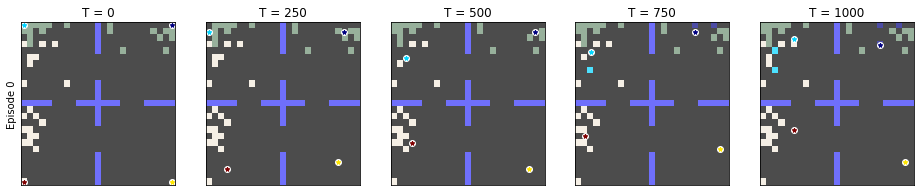

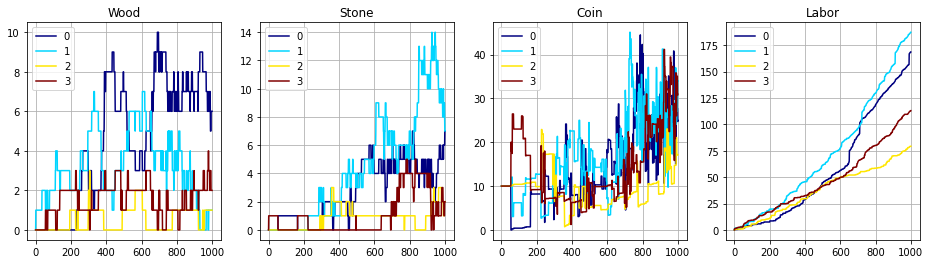

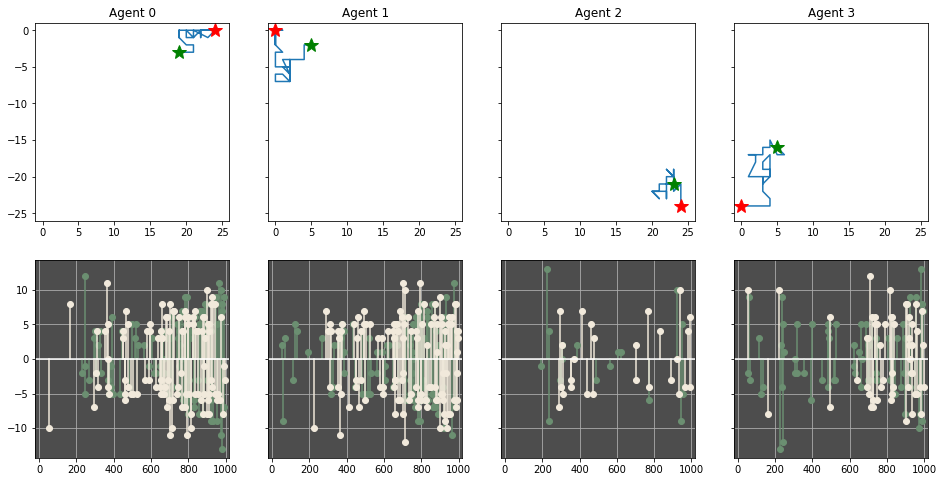

In [32]:
from utils import plotting  # plotting utilities for visualizing env. state

dense_log_idx = 0
plotting.breakdown(dense_logs[dense_log_idx]);

In [ ]:
# Shutdown Ray after use
ray.shutdown()